<a href="https://colab.research.google.com/github/doo52oh/Dacon/blob/main/Predict_Parking_Demand/%EC%A3%BC%EC%B0%A8%EC%88%98%EC%9A%94_%EC%98%88%EC%B8%A1_%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주차 수요 예측 경진대회

**[배경]**



* 아파트 단지 내 필요한 주차대수는 ①법정주차대수 ②장래주차수요 중 큰 값에 따라 결정하게되어 있어, 정확한 ②장래주차수요의 산정을 필요로 합니다.  
* 현재 ②장래주차수요는 ‘주차원단위’와 ‘건축연면적’을 기초로하여 산출되고 있으며, ‘주차원단위’는 신규 건축예정 부지 인근의 유사 단지를 피크 시간대 방문하여 주차된 차량대수를 세는 방법으로 조사하고 있습니다.  
* 이 경우 인력조사로 인한 오차발생, 현장조사 시점과 실제 건축시점과의 시간차 등의 문제로 과대 또는 과소 산정의 가능성을 배제할 수 없습니다.  

**[주제]**

🏠 유형별 임대주택 설계 시 단지 내 적정 🅿️ 주차 수요를 예측


**[주최 / 주관]**

주최 : 한국토지주택공사  
주관 : 데이콘



# Data

**설명**
**train.csv - 학습용 데이터**

* 단지코드  
* 총세대수  
* 임대건물구분  
* 지역  
* 공급유형  
* 전용면적  
* 전용면적별세대수  
* 공가수  
* 신분  
* 임대료보증금  
* 임대료  
* 도보 10분거리 내 지하철역 수(환승노선 수 반영)  
* 도보 10분거리 내 버스정류장 수  
* 단지내주차면수  
* 등록차량수  


**test.csv - 테스트 데이터**

* 단지코드
* 총세대수
* 임대건물구분
* 지역
* 공급유형
* 전용면적
* 전용면적별세대수
* 공가수
* 신분
* 임대료보증금
* 임대료
* 도보 10분거리 내 지하철역 수(환승노선 수 반영)
* 도보 10분거리 내 버스정류장 수
* 단지내주차면수


**age_gender_info.csv - 지역 임대주택 나이별, 성별 인구 분포**

* 지역
* 10대미만(여자)
* 10대미만(남자)
* 20대(여자)
* 20대(남자)
* 30대(여자)
* 30대(남자)
* 40대(여자)
* 40대(남자)
* 50대(여자)
* 50대(남자)
* 60대(여자)
* 60대(남자)
* 70대(여자)
* 70대(남자)
* 80대(여자)
* 80대(남자)
* 90대(여자)
* 90대(남자)
* 100대(여자)
* 100대(남자)


**sample_submission.csv - 제출 양식**

* code : 단지 코드
* num : 등록차량수

# Packages

In [1]:
# [나눔폰트 설치](https://teddylee777.github.io/colab/colab-korean)

##!sudo apt-get install -y fonts-nanum
##!sudo fc-cache -fv
##!rm ~/.cache/matplotlib -rf

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

import warnings
warnings.filterwarnings("ignore")

# Load Data

In [3]:
age_gender = pd.read_csv('age_gender_info.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [4]:
train.shape, test.shape, age_gender.shape, submission.shape

((2952, 15), (1022, 14), (16, 23), (150, 2))

In [5]:
train.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


In [6]:
test.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
0,C1072,754,아파트,경기도,국민임대,39.79,116,14.0,H,22830000,189840,0.0,2.0,683.0
1,C1072,754,아파트,경기도,국민임대,46.81,30,14.0,A,36048000,249930,0.0,2.0,683.0
2,C1072,754,아파트,경기도,국민임대,46.90,112,14.0,H,36048000,249930,0.0,2.0,683.0
3,C1072,754,아파트,경기도,국민임대,46.90,120,14.0,H,36048000,249930,0.0,2.0,683.0
4,C1072,754,아파트,경기도,국민임대,51.46,60,14.0,H,43497000,296780,0.0,2.0,683.0


In [7]:
age_gender.head()

,지역,10대미만(여자),10대미만(남자),10대(여자),10대(남자),20대(여자),20대(남자),30대(여자),30대(남자),40대(여자),40대(남자),50대(여자),50대(남자),60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
0,경상북도,0.030158,0.033195,0.056346,0.061360,0.060096,0.067859,0.053433,0.049572,0.083660,0.072613,0.087149,0.072146,0.082684,0.063889,0.047717,0.030172,0.029361,0.011211,0.005578,0.001553,0.000234,0.000014
1,경상남도,0.027400,0.026902,0.053257,0.055568,0.064920,0.070618,0.056414,0.057550,0.077092,0.067600,0.086873,0.072570,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010
2,대전광역시,0.028197,0.029092,0.040490,0.042793,0.060834,0.064247,0.068654,0.066848,0.074667,0.067925,0.085751,0.068819,0.088468,0.070261,0.051010,0.037143,0.032455,0.013751,0.006494,0.001740,0.000298,0.000066
3,경기도,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,0.077345,0.064859,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067
4,전라북도,0.028089,0.029065,0.059685,0.060080,0.066262,0.070322,0.052027,0.046596,0.077005,0.066645,0.081408,0.074382,0.076636,0.068042,0.051025,0.035748,0.035049,0.012641,0.007223,0.001898,0.000158,0.000013


In [8]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
총세대수,2952.0,886.661247,513.540168,26.00,513.50,779.00,1106.0000,2568.0
전용면적,2952.0,44.757215,31.874280,12.62,32.10,39.93,51.5625,583.4
전용면적별세대수,2952.0,102.747967,132.640159,1.00,14.00,60.00,144.0000,1865.0
공가수,2952.0,12.921070,10.778831,0.00,4.00,11.00,20.0000,55.0
도보 10분거리 내 지하철역 수(환승노선 수 반영),2741.0,0.176578,0.427408,0.00,0.00,0.00,0.0000,3.0
도보 10분거리 내 버스정류장 수,2948.0,3.695726,2.644665,0.00,2.00,3.00,4.0000,20.0
단지내주차면수,2952.0,601.668360,396.407072,13.00,279.25,517.00,823.0000,1798.0
등록차량수,2952.0,559.768293,433.375027,13.00,220.00,487.00,770.0000,2550.0


In [9]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
총세대수,1022.0,862.080235,536.340894,75.00,488.000,745.00,1161.0,2572.0
전용면적,1022.0,43.706311,35.890759,9.96,33.135,39.72,47.4,583.4
전용면적별세대수,1022.0,100.414873,125.997855,1.00,14.000,60.00,140.0,1341.0
공가수,1022.0,15.544031,11.070140,0.00,6.000,15.00,23.0,45.0
도보 10분거리 내 지하철역 수(환승노선 수 반영),980.0,0.136735,0.435500,0.00,0.000,0.00,0.0,2.0
도보 10분거리 내 버스정류장 수,1022.0,4.626223,5.414568,1.00,2.000,3.00,5.0,50.0
단지내주차면수,1022.0,548.771037,342.636703,29.00,286.000,458.00,711.0,1696.0


In [10]:
age_gender.describe().T

,count,mean,std,min,25%,50%,75%,max
10대미만(여자),16.0,0.029229,0.005938,0.015323,0.026548,0.029523,0.032665,0.038030
10대미만(남자),16.0,0.030512,0.006121,0.015627,0.026676,0.031196,0.034820,0.039507
10대(여자),16.0,0.050039,0.010954,0.025210,0.047510,0.053214,0.059096,0.060094
10대(남자),16.0,0.052110,0.011193,0.026121,0.048234,0.054779,0.061413,0.063379
20대(여자),16.0,0.063256,0.006266,0.052712,0.060305,0.063399,0.065703,0.079284
20대(남자),16.0,0.066395,0.005236,0.056782,0.063974,0.067367,0.070326,0.074689
30대(여자),16.0,0.061250,0.014111,0.047049,0.052629,0.058899,0.065544,0.106121
30대(남자),16.0,0.060140,0.014301,0.046596,0.051301,0.055473,0.066962,0.104447
40대(여자),16.0,0.075738,0.007822,0.054216,0.075033,0.077725,0.080158,0.083660
40대(남자),16.0,0.070582,0.005248,0.060769,0.067843,0.070602,0.073796,0.079183


# Age_Gender

In [11]:
age_gender['지역']

0        경상북도
1        경상남도
2       대전광역시
3         경기도
4        전라북도
5         강원도
6       광주광역시
7        충청남도
8       부산광역시
9     제주특별자치도
10      울산광역시
11       충청북도
12       전라남도
13      대구광역시
14      서울특별시
15    세종특별자치시
Name: 지역, dtype: object

In [12]:
region = age_gender.set_index('지역')

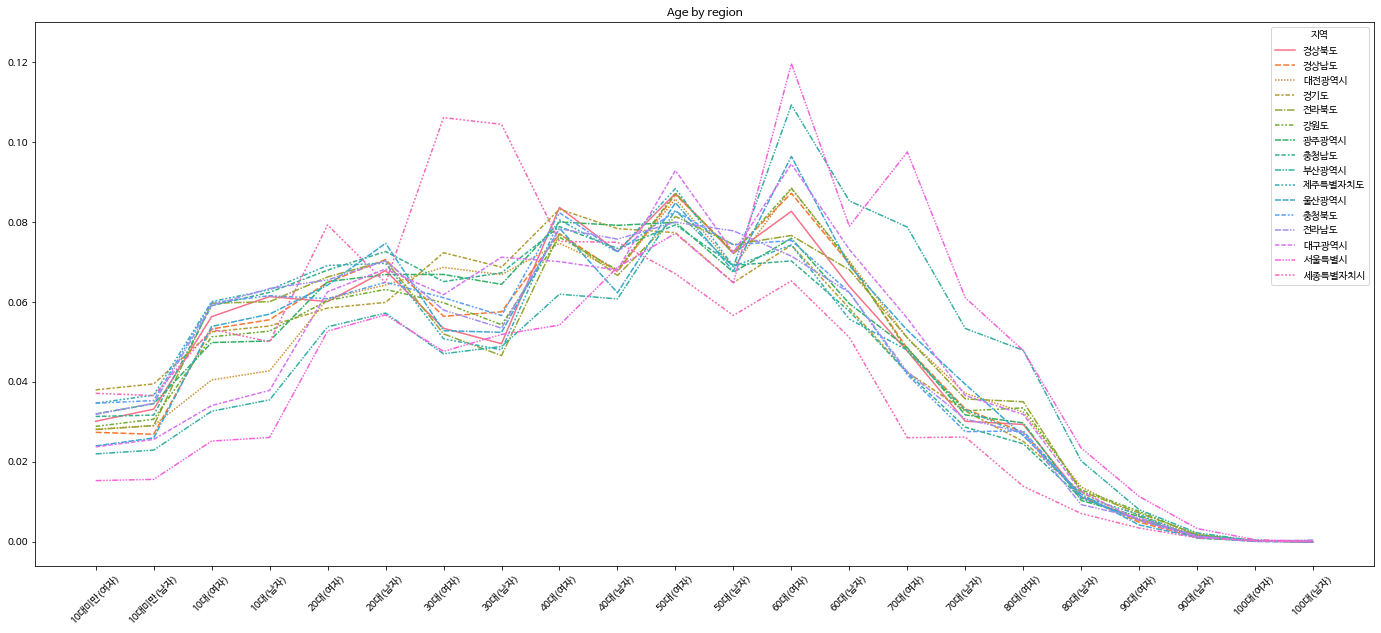

In [13]:
fig = plt.figure(figsize = (24, 10))
sns.lineplot(data=region.T, )
plt.title('Age by region')
plt.xticks(rotation=45)
plt.ylim(top=0.13)
plt.show()

* 같은 나이대임에도 성별에 따라 편차가 존재합니다. 대체로 남성보다는 여성이 높은 비율을 보이고 있습니다.
* 서울특별시는 60대 여성, 70대 여성에서 피크를 보이고 있습니다.
* 부산광역시 또한 서울과 비슷한 패턴을 보입니다.
* 세종특별자치시는 다른 시도와는 다르게 30대에서 매우 높은 비중을 보입니다

In [14]:
region.loc['전체 평균'] = region.mean()
region.loc['광역시 평균'] = region.loc[(region.index.str.contains('시')) & (~region.index.str.contains('세종'))].mean()
region.loc['도 평균'] = region.loc[region.index.str.contains('도')].mean()


In [15]:
region

,10대미만(여자),10대미만(남자),10대(여자),10대(남자),20대(여자),20대(남자),30대(여자),30대(남자),40대(여자),40대(남자),50대(여자),50대(남자),60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
지역,,,,,,,,,,,,,,,,,,,,,,
경상북도,0.030158,0.033195,0.056346,0.061360,0.060096,0.067859,0.053433,0.049572,0.083660,0.072613,0.087149,0.072146,0.082684,0.063889,0.047717,0.030172,0.029361,0.011211,0.005578,0.001553,0.000234,0.000014
경상남도,0.027400,0.026902,0.053257,0.055568,0.064920,0.070618,0.056414,0.057550,0.077092,0.067600,0.086873,0.072570,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010
대전광역시,0.028197,0.029092,0.040490,0.042793,0.060834,0.064247,0.068654,0.066848,0.074667,0.067925,0.085751,0.068819,0.088468,0.070261,0.051010,0.037143,0.032455,0.013751,0.006494,0.001740,0.000298,0.000066
경기도,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,0.078355,0.077345,0.064859,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067
전라북도,0.028089,0.029065,0.059685,0.060080,0.066262,0.070322,0.052027,0.046596,0.077005,0.066645,0.081408,0.074382,0.076636,0.068042,0.051025,0.035748,0.035049,0.012641,0.007223,0.001898,0.000158,0.000013
강원도,0.028888,0.030682,0.051287,0.052712,0.060374,0.063157,0.059821,0.054321,0.076201,0.068002,0.087266,0.072177,0.088423,0.070014,0.047732,0.032760,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017
광주광역시,0.031994,0.034566,0.049851,0.050254,0.065084,0.066875,0.066888,0.064416,0.080028,0.079183,0.079902,0.067443,0.075930,0.059586,0.048552,0.031754,0.029749,0.010341,0.006343,0.000895,0.000353,0.000013
충청남도,0.031369,0.031711,0.059077,0.062422,0.067975,0.072622,0.065095,0.067303,0.078860,0.073418,0.079299,0.069167,0.070278,0.057692,0.042296,0.028682,0.024514,0.010900,0.005429,0.001549,0.000219,0.000123
부산광역시,0.022003,0.022947,0.032681,0.035512,0.053796,0.057233,0.047049,0.048866,0.061952,0.060769,0.082899,0.068855,0.109297,0.085294,0.078743,0.053388,0.047908,0.020228,0.008043,0.002240,0.000268,0.000028


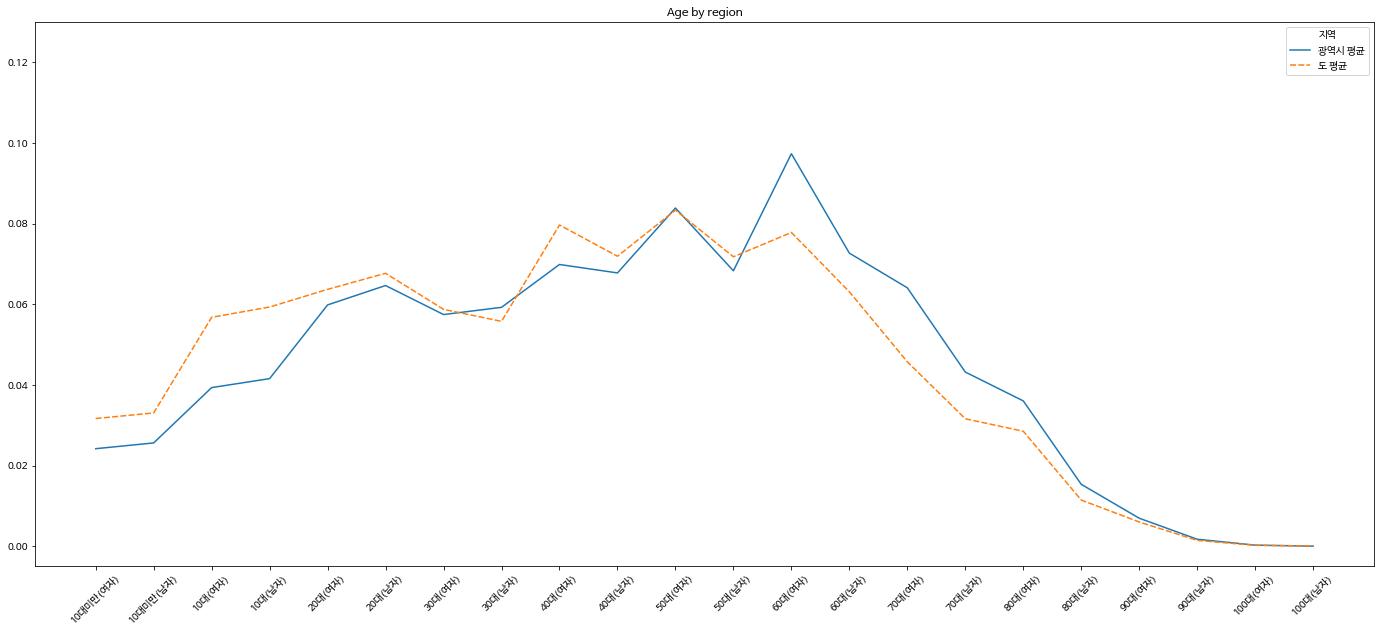

In [18]:
county = region.loc[['광역시 평균', '도 평균']]

fig = plt.figure(figsize = (24, 10))
sns.lineplot(data=county.T, )
plt.title('Age by region')
plt.xticks(rotation=45)
plt.ylim(top=0.13)
plt.show()

* 60대 이상은 광역시 평균이 더 높게 나타나고 있습니다
* 30대 남자를 제외한 60대 미만 은 대체로 도 평균이 더 높게 나타나고 있습니다